# Regularization

# Data augmentation Technique

- Data Augmentation is used when number of images we have are not sufficient. This type of augmentation is done in case of images only when we change quality of image in different ways so our algorithm has got more samples to learn from.
- If every image is having a slightly different quality then from every image out n/w or model will try to extract some more information.
- Resizing & Rescaling will have to be applied to images before using any method for data augmentation whether through Keras or Tensorflow.
- Augmentation is done during training part only.

*Data Augmentation & K-fold techniques which are based on data will increase time complexity but also enhance the accuracy.Both methods can be applied on numeric data & image data*

## Overview

Data Augmentation: a technique to increase the diversity of the training set by applying random (but realistic) transformations, such as image rotation.

In Keras we have got layers that help us to create different types of images from the same image that we r having & r available in layers module in Keras.

<font color=blue>Data Augmentation can be done as follows:

<font color=blue>1. **Using Keras preprocessing layers, such as **
Here we are accessing Keras through tensorflow
* `tf.keras.layers.Resizing`, 
* `tf.keras.layers.Rescaling`, 
* `tf.keras.layers.RandomFlip`, and 
* `tf.keras.layers.RandomRotation`.
    
<font color=blue>2. **Using tf.image methods, such as **
This is through standalone tensorflow
* `tf.image.flip_left_right`, 
* `tf.image.rgb_to_grayscale`, 
* `tf.image.adjust_brightness`, 
* `tf.image.central_crop`, and 
* `tf.image.stateless_random*`.
    
<font color=blue>3. **Using keras.preprocessing.image.ImageDataGenerator **
Here we are accessing Keras through tensorflow


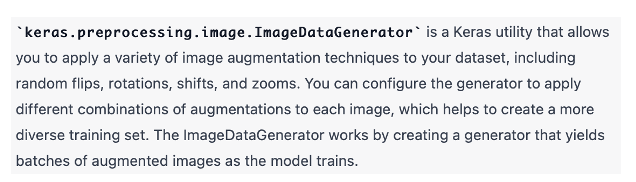

After u apply the augmentation by using above techniques then for model every image will be a different sample. e.g. image is blurred, rotated, contrast enhanced etc everytime image will have some new information.

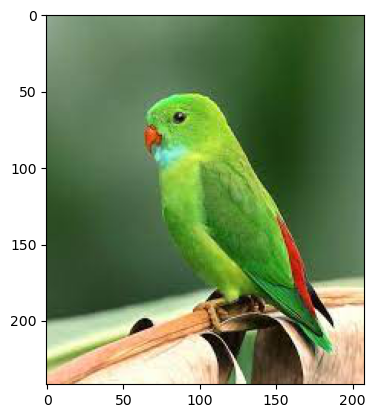

In [1]:
# Example of horizontal shift image augmentation
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# load the image
img = load_img('datasets/bird.jpeg')
plt.imshow(img)

# convert to numpy array
data = img_to_array(img)


In [2]:
# Expand dimension to one sample
samples = expand_dims(data, 0)

In [3]:
# Create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-100,100])

**ImageDataGenerator is the main library that will help us in producing new images from existing images.**

**<font color-blue>Tranformations applied by ImageDataGenerator are per-batch basis & not per-epoch basis and there can be many batches in 1 epoch. Also type of transformation applied will be random even within 1 batch & of course can vary among batches in an epoch**

**Note**

Image augmentation / data augmentation is performed during running/execution time.

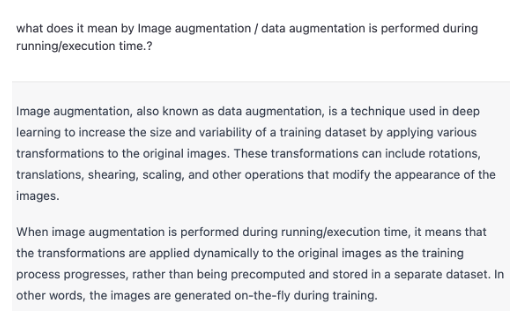

# <font color=blue>Epoch vs Iterations
    


        Epoch = 1 complete pass through entire training dataset.

        Iterations happen inside epoch.


              Number of batches = Total images/batch size
                                = 1000/10
                                = 100 batches 
                                
                            
                                
              Number of Iterations = Total images/batch size
                                   = 1000/10
                                   = 100 Iterations in an epoch
                                
                                
              Each iteration corresponds to 1 batch of data being processed by the model.                  
                                                          

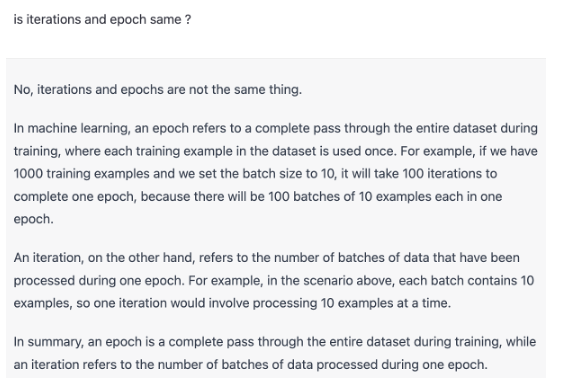

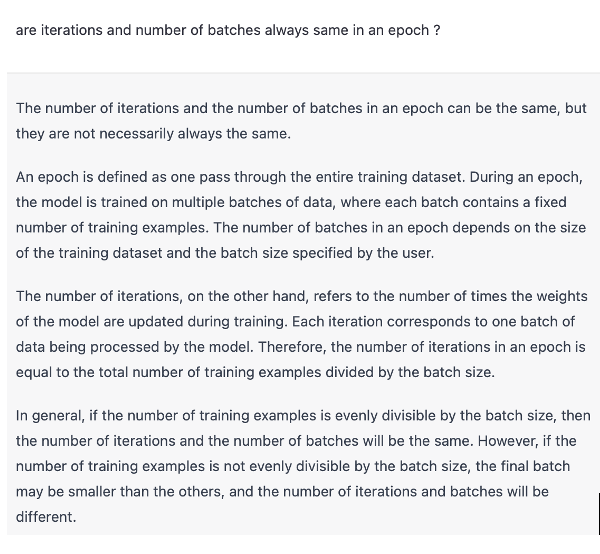

How many images does ImageDataGenerator generate?

    if there are 1000 images in the dataset and the batch size is defined as 10. Then the "ImageDataGenerator" will produce 10 images in each iteration of the training and there will be 100 iterations in 1 epoch of training. In this way in each iteration 10 images will be generated so in 1 epoch 100*10=1000 images.
    An iteration is defined as steps per epoch i.e. the total number of samples / batch_size.
    
    basically we are augmenting the images when we use ImageDataGenerator and enabling its augmentation capabilities.
    But the word "augmentation" here DOES NOT MEAN, say, if we have 100 original training images we end up having 1000 images per epoch after augmentation (i.e. the number of training images does not increase per epoch). 
    
    Instead, it means we use a different transformation of each image in each epoch; hence, if we train our model for, say, 5 epochs, we have used 5 different versions of each original image in training (or 100 * 5 = 500 different images in the whole training, instead of using just the 100 original images in the whole training). 
    
    To put it differently, the total number of unique images increases in the whole training from start to finish, and not per epoch.
 

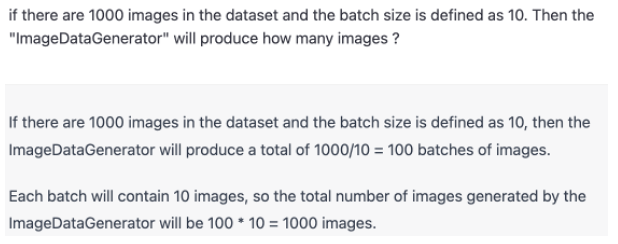

In [4]:
# Prepare iterator
it = datagen.flow(samples, batch_size=1) # note batch_size=1 only as anyway only single image

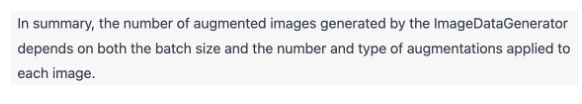

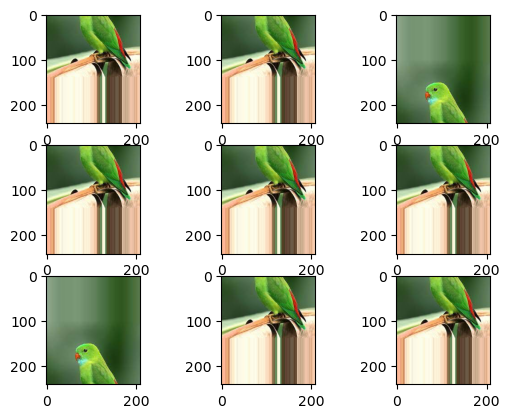

In [5]:
# Generate samples and plot
for i in range(9):
# define subplot
    plt.subplot(330 + 1 + i)
# generate batch of images
    batch = it.next()
# convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

**Data Augmentation is only used for training purpose not for testing**

Even if there is a slight difference in image, it will be a learning example for algorithm. Above all 9 images are produced by just 1 transformation width_shift_range=[-100,100], similarly other transformations can be applied.

The work of neural n/w is to identify the edges so if u provide more images it will be able to learn more u will be able to get better results.

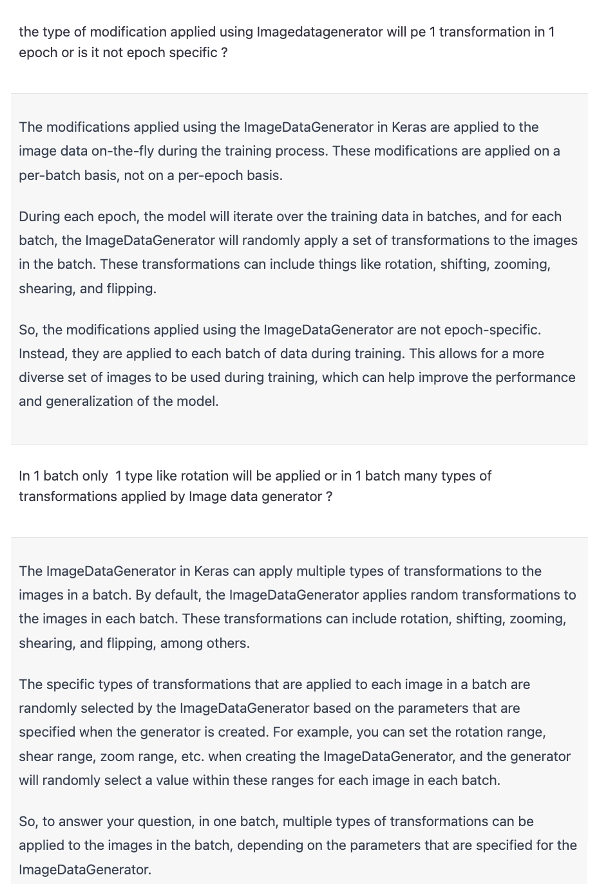

Now instead of using a single image like above we will use a dataset.

### Importing useful libraries

In [6]:
#pip install tensorflow_datasets

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

/Users/sylvia/opt/anaconda3/envs/tf_dl/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


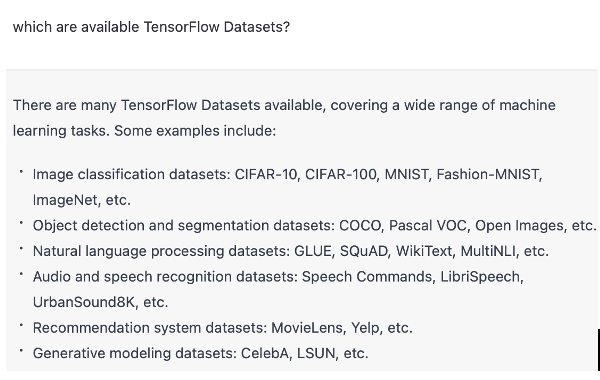

### Tensorflow Datasets

https://www.tensorflow.org/datasets/catalog/overview

### Download a dataset

* dataset used - tf_flowers. 
* For convenience, download the dataset using TensorFlow Datasets
* you will have to install it first through `pip install tensorflow_datasets`
* For other ways of importing data, refer https://www.tensorflow.org/tutorials/load_data/images


In [8]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

2023-04-01 13:07:04.145379: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The flowers dataset has five classes.

In [9]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


Retrieve an image from the dataset and use it to demonstrate data augmentation.

2023-04-01 13:07:04.255583: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


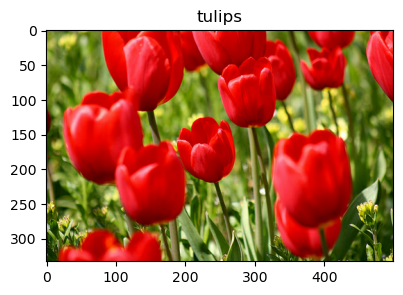

In [10]:
get_label_name = metadata.features['label'].int2str

plt.figure(figsize=(5,3))
image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

## Keras preprocessing layers

*In Fashion MNIST dataset size of images was consistent, only per-processing we did was normalize data by dividing by 255.*

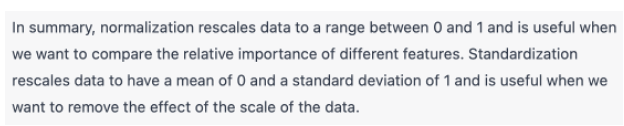

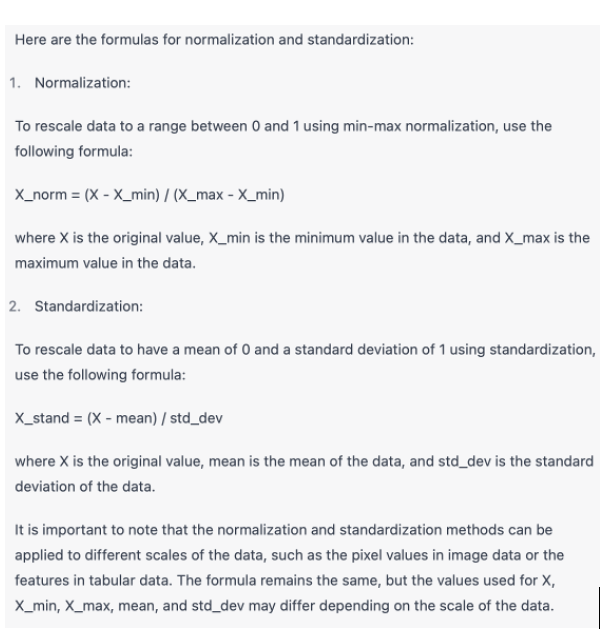

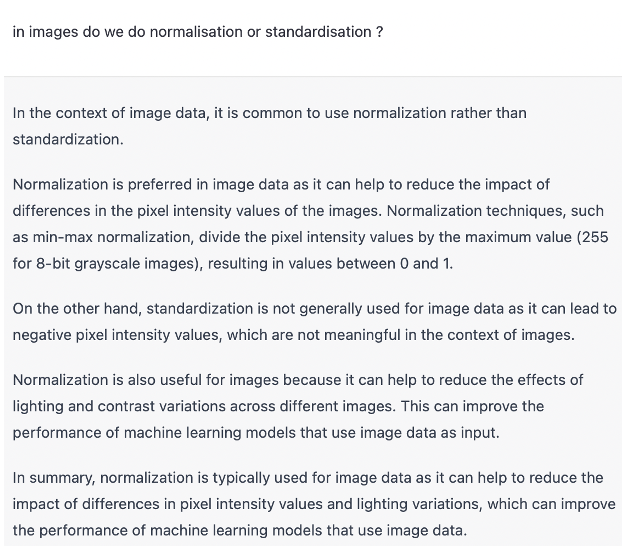

### Resizing and rescaling


You can use the Keras preprocessing layers to resize your images to a consistent shape (with `tf.keras.layers.Resizing`), and to rescale pixel values (with `tf.keras.layers.Rescaling`).

Since colored image no need to add dimension if greyscale need to add dimension. 

In [11]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

### Note3: The rescaling layer above standardizes pixel values to the `[0, 1]` range. If instead you wanted it to be `[-1, 1]`, you would write `tf.keras.layers.Rescaling(1./127.5, offset=-1)`.


You can visualize the result of applying these layers to an image. 

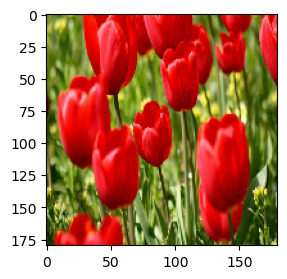

In [12]:
result = resize_and_rescale(image)
plt.figure(figsize=(5,3))

_ = plt.imshow(result)

After resizing configuration of image changed to (180,180) but that is not going to affect working of our neural n/w. Model basically works on contrast whenever there is a change in pixel values.

Verify that the pixels are in the `[0, 1]` range:

In [13]:
print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

Min and max pixel values: 0.0 1.0


### Data augmentation

Models & layers r 2 important modules of Keras. Model will help us in designing architecture of neural n/w & layers help in defining type of layers we have. *Many things like dropout, augmentation are actually not layers but r kept under layers module of Keras assuming tht it is through layers that the data is passing.*

Keras preprocessing layers that can be used for data augmentation are:
1. `tf.keras.layers.RandomFlip` and 
2. `tf.keras.layers.RandomRotation`.

The model will then able to extract same information from different positions & learn more.

#### Creating a few preprocessing layers and applying them repeatedly to the same image.

In [14]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [15]:
# Add the image to a batch.
image = tf.expand_dims(image, 0)

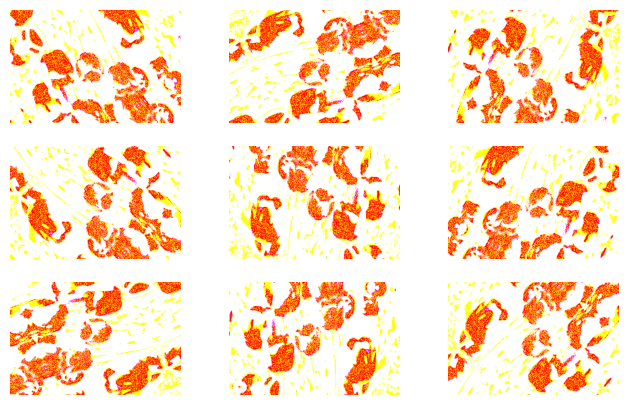

In [16]:
plt.figure(figsize=(8, 5))
for i in range(9):

    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

Identifying just presence of flower may not be v.difficult but identifying type of flower when 5 types of flower are present may be difficult.

**<font color=blue>The kind of augmentation will also depend on domain we r working.** e.g. in insurance company it is important to know if car has completely tilt down or not inorder to pay insurance. e.g. if we take houses total inversion is not needed but u need to see ways how the house can be damaged  ** e.g. in case of medical images, image is to be taken from different angles, different orientations are to be seen so no important information is missed e.g. in identification of plant diseases no need to see inverted image but u may have to zoom the image a bit to see for deformity e.g. tool defect identification inversion might be there.

There are a variety of preprocessing layers that can be used for data augmentation such as:
1. `tf.keras.layers.RandomContrast`, 
2. `tf.keras.layers.RandomCrop`, 
3. `tf.keras.layers.RandomZoom`, 

### Two options to use the Keras preprocessing layers

There are two ways you can use these preprocessing layers, with important trade-offs.

#### <font color=blue>Option 1: Make the data augmentation preprocessing layers part of the model

In [17]:
model = tf.keras.Sequential([
  # Add the preprocessing layers you created earlier.
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # Rest of your model.
])
### model.summary()

There are two important points to be aware of in this case:

* Data augmentation will run on-device, synchronously with the rest of your layers, and benefit from GPU acceleration.
* When you export your model using `model.save`, the preprocessing layers will be saved along with the rest of your model. 
* If you later deploy this model, it will automatically standardize images (according to the configuration of your layers). 

### Note: Data augmentation is inactive at test time so input images will only be augmented during calls to `Model.fit` (not `Model.evaluate` or `Model.predict`).

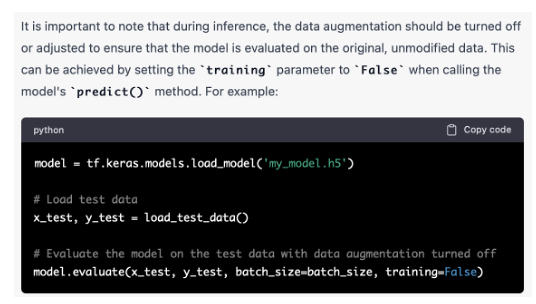


#### <font color=blue>Option 2: Apply the augmentation preprocessing layers to the dataset

map(), filter(), reduce(), sorted() functions are used in conjugation with some other functions & generally that function is a lambda function.

In [18]:
aug_ds = train_ds.map(          # applied to train_ds
  lambda x, y: (resize_and_rescale(x, training=True), y))

With this approach, you use `Dataset.map` to create a dataset that yields `batches of augmented images`. In this case:

* Data augmentation will happen asynchronously on the CPU, and is non-blocking. You can overlap the training of your model on the GPU with data preprocessing, using `Dataset.prefetch`, shown below.
* In this case the preprocessing layers will not be exported with the model when you call `Model.save`. 
* You need to attach them to your model before saving it or reimplement them server-side. After training, you can attach the preprocessing layers before export.

### Using Option 2

Configure the training, validation, and test datasets with the Keras preprocessing layers that were created earlier. 
Also configure the datasets for performance, using parallel reads and buffered prefetching to yield batches from disk without I/O become blocking. 

### Note 5: Data augmentation should only be applied to the training set.

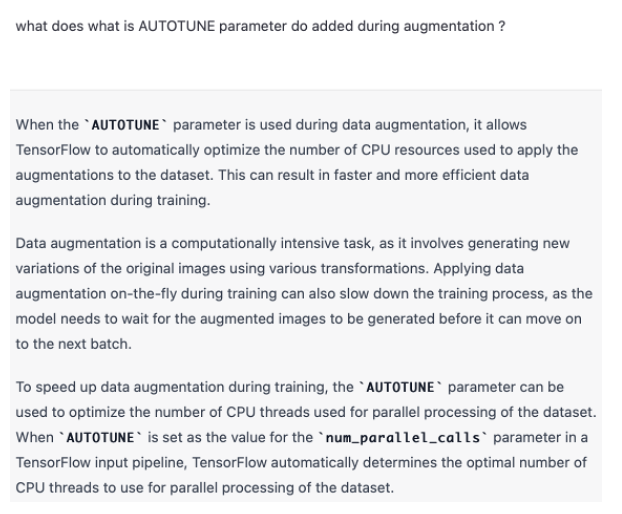

In [19]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE 
##AUTOTUNE , will prompt the tf. data runtime to tune the value dynamically at runtime.

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)


In [20]:
train_ds = prepare(train_ds, shuffle=True, augment=True)  # Only training data augment=True
val_ds = prepare(val_ds)               # For val & test, augment=True not required 
test_ds = prepare(test_ds)

### Train a model

Train a model using the prepared datasets .

The [Sequential](https://www.tensorflow.org/guide/keras/sequential_model) model consists of three convolution blocks (`tf.keras.layers.Conv2D`) with a max pooling layer (`tf.keras.layers.MaxPooling2D`) in each of them. There's a fully-connected layer (`tf.keras.layers.Dense`) with 128 units on top of it that is activated by a ReLU activation function (`'relu'`). 

* This model has not been tuned for accuracy (the goal is to show the mechanics).

In [21]:
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
##**************************************************************  
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
##***************************************************************  
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
##*****************************************************************  
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Choose the `tf.keras.optimizers.Adam` optimizer and `tf.keras.losses.SparseCategoricalCrossentropy` loss function. To view training and validation accuracy for each training epoch, pass the `metrics` argument to `Model.compile`.

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train for a few epochs:

**This train_ds is already augmented dataset & hence in model we have not specified augmentation**

In [23]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 23s 241ms/step - loss: 1.3635 - accuracy: 0.4101 - val_loss: 1.1296 - val_accuracy: 0.5422
Epoch 2/10
92/92 [==============================] - 22s 234ms/step - loss: 1.0930 - accuracy: 0.5616 - val_loss: 1.0328 - val_accuracy: 0.6294
Epoch 3/10
92/92 [==============================] - 22s 235ms/step - loss: 0.9942 - accuracy: 0.6104 - val_loss: 0.9675 - val_accuracy: 0.6403
Epoch 4/10
92/92 [==============================] - 22s 235ms/step - loss: 0.9248 - accuracy: 0.6390 - val_loss: 0.8863 - val_accuracy: 0.6676
Epoch 5/10
92/92 [==============================] - 22s 237ms/step - loss: 0.8728 - accuracy: 0.6584 - val_loss: 0.8774 - val_accuracy: 0.6812
Epoch 6/10
92/92 [==============================] - 22s 235ms/step - loss: 0.8345 - accuracy: 0.6785 - val_loss: 0.8176 - val_accuracy: 0.6948
Epoch 7/10
92/92 [==============================] - 22s 232ms/step - loss: 0.8226 - accuracy: 0.6717 - val_loss: 0.8145 - val_accuracy: 0.6921

In [24]:
loss, acc = model.evaluate(test_ds)
print("Accuracy", acc)

12/12 [==============================] - 1s 67ms/step - loss: 0.7416 - accuracy: 0.6948
Accuracy 0.6948229074478149


## <font color=blue>Using tf.image now instead of Keras preprocessing utilities we saw earlier above (as only from tensorflow also we can convert/augment images)

The above Keras preprocessing utilities are convenient. But, for finer control, you can write your own data augmentation pipelines or layers using `tf.data` and `tf.image`. 

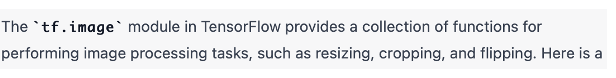

Since the flowers dataset was previously configured with data augmentation, let's reimport it to start fresh:

In [25]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Retrieve an image to work with:

2023-04-01 13:10:47.588242: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


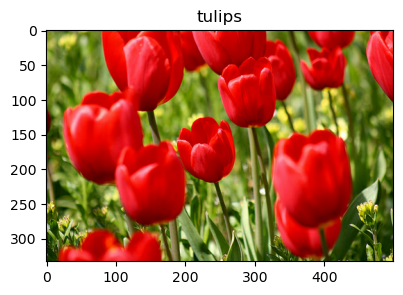

In [26]:
image, label = next(iter(train_ds))
plt.figure(figsize=(5,3))

_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

Let's use the following function to visualize and compare the original and augmented images side-by-side:

In [27]:
# Defining function
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)

### Data augmentation

#### Flip an image

Flip an image either vertically or horizontally with `tf.image.flip_left_right`:

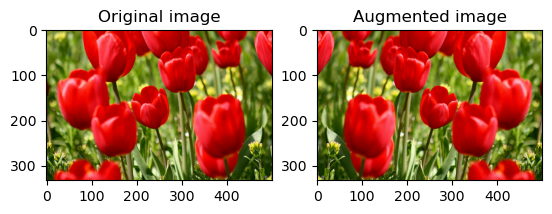

In [28]:
flipped = tf.image.flip_left_right(image)

# Call visualize function defined above
visualize(image, flipped)

#### Grayscale an image

You can grayscale an image with `tf.image.rgb_to_grayscale`:

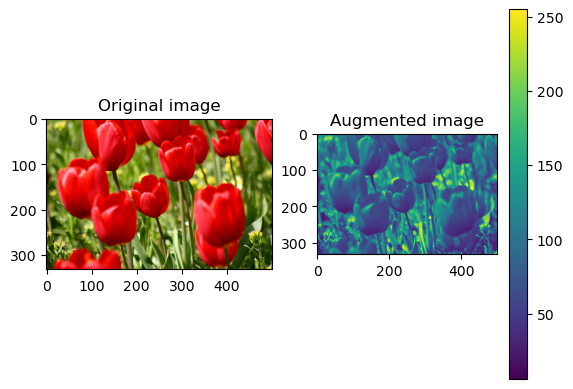

In [29]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
_ = plt.colorbar()

#### Saturate an image

Saturate an image with `tf.image.adjust_saturation` by providing a saturation factor:

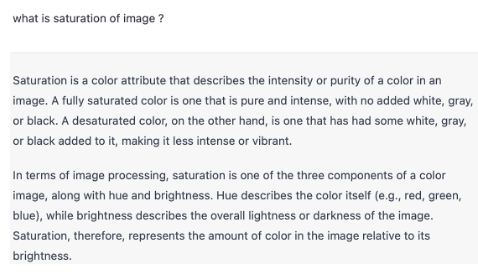

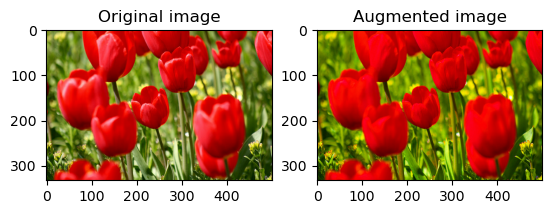

In [30]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)

#### Change image brightness

Change the brightness of image with `tf.image.adjust_brightness` by providing a brightness factor:

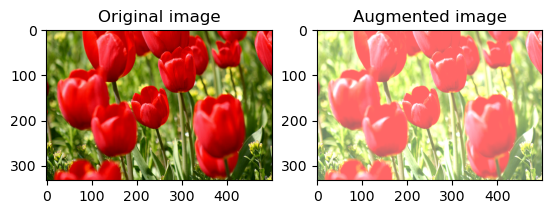

In [31]:
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

#### Center crop an image

Crop the image from center up to the image part you desire using `tf.image.central_crop`:

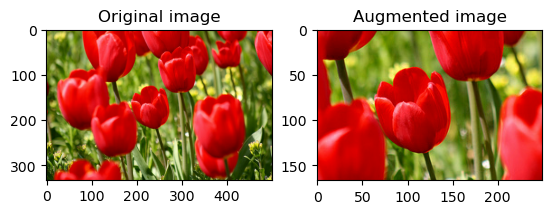

In [32]:
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image, cropped)

#### Rotate an image

Rotate an image by 90 degrees with `tf.image.rot90`:

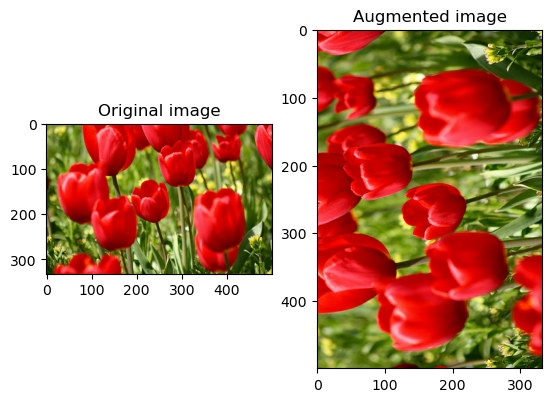

In [33]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

### Random transformations

Warning: There are two sets of random image operations: `tf.image.random*` and `tf.image.stateless_random*`. Using `tf.image.random*` operations is strongly discouraged as they use the old RNGs from TF 1.x. Instead, please use the random image operations introduced in this tutorial. For more information, refer to [Random number generation](../../guide/random_numbers.ipynb).

Applying random transformations to the images can further help generalize and expand the dataset. The current `tf.image` API provides eight such random image operations (ops):

*   [`tf.image.stateless_random_brightness`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_brightness)
*   [`tf.image.stateless_random_contrast`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_contrast)
*   [`tf.image.stateless_random_crop`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_crop)
*   [`tf.image.stateless_random_flip_left_right`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_flip_left_right)
*   [`tf.image.stateless_random_flip_up_down`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_flip_up_down)
*   [`tf.image.stateless_random_hue`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_hue)
*   [`tf.image.stateless_random_jpeg_quality`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_jpeg_quality)
*   [`tf.image.stateless_random_saturation`](https://www.tensorflow.org/api_docs/python/tf/image/stateless_random_saturation)

These random image ops are purely functional: the output only depends on the input. This makes them simple to use in high performance, deterministic input pipelines. They require a `seed` value be input each step. Given the same `seed`, they return the same results independent of how many times they are called.

### Note1: `seed` is a `Tensor` of shape `(2,)`  whose values are any integers.

In the following sections, you will:
1.   Go over examples of using random image operations to transform an image.
2.   Demonstrate how to apply random transformations to a training dataset.

#### Randomly change image brightness

Randomly change the brightness of `image` using `tf.image.stateless_random_brightness` by providing a brightness factor and `seed`. The brightness factor is chosen randomly in the range `[-max_delta, max_delta)` and is associated with the given `seed`.

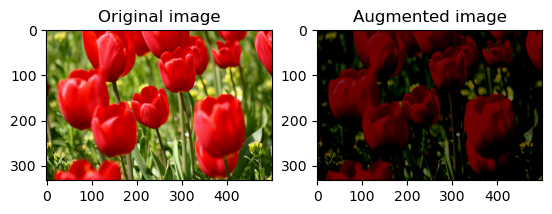

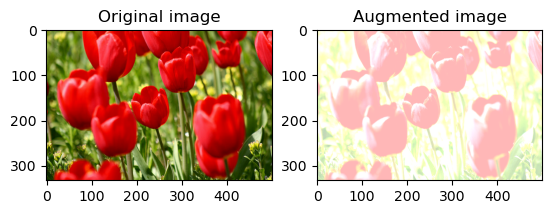

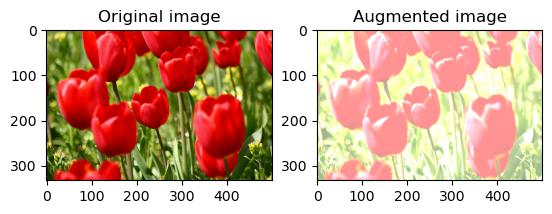

In [34]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_brightness = tf.image.stateless_random_brightness(
      image, max_delta=0.95, seed=seed)
  visualize(image, stateless_random_brightness)

#### Randomly change image contrast

Randomly change the contrast of `image` using `tf.image.stateless_random_contrast` by providing a contrast range and `seed`. The contrast range is chosen randomly in the interval `[lower, upper]` and is associated with the given `seed`.

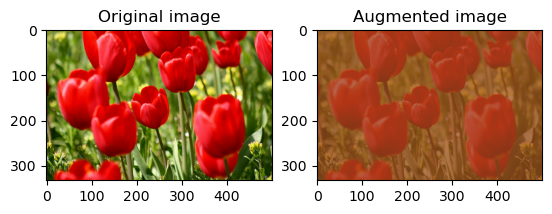

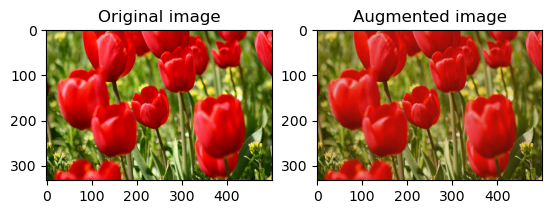

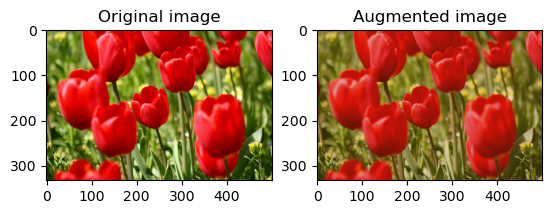

In [35]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_contrast = tf.image.stateless_random_contrast(
      image, lower=0.1, upper=0.9, seed=seed)
  visualize(image, stateless_random_contrast)

#### Randomly crop an image

Randomly crop `image` using `tf.image.stateless_random_crop` by providing target `size` and `seed`. The portion that gets cropped out of `image` is at a randomly chosen offset and is associated with the given `seed`.

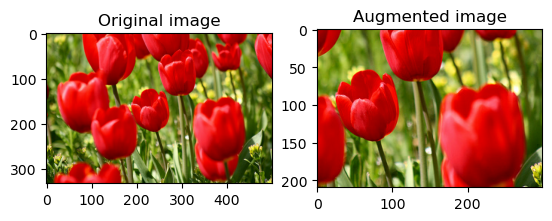

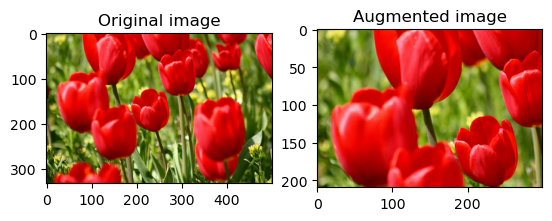

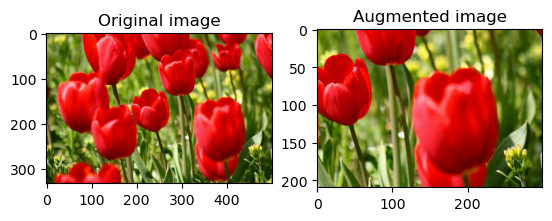

In [36]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_crop = tf.image.stateless_random_crop(
      image, size=[210, 300, 3], seed=seed)
  visualize(image, stateless_random_crop)

## Apply augmentation to a dataset using tensorflow

In augmentation through Tensorflow alone options are slightly more than augmentation through Keras alone.

Let's first download the image dataset again in case they are modified in the previous sections.

In [37]:
(train_datasets, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Next, define a utility function for resizing and rescaling the images. This function will be used in unifying the size and scale of images in the dataset:

In [38]:
def resize_and_rescale(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = (image / 255.0)
    return image, label

Let's also define the `augment` function that can apply the random transformations to the images. This function will be used on the dataset in the next step.

In [39]:
def augment(image_label, seed):
  image, label = image_label
  image, label = resize_and_rescale(image, label)
  image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6)
  # Make a new seed.
  new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
  # Random crop back to the original size.
  image = tf.image.stateless_random_crop(
      image, size=[IMG_SIZE, IMG_SIZE, 3], seed=seed)
  # Random brightness.
  image = tf.image.stateless_random_brightness(
      image, max_delta=0.5, seed=new_seed)
  image = tf.clip_by_value(image, 0, 1)
  return image, label

#### Option 1: Using tf.data.experimental.Counter

    Create a `tf.data.experimental.Counter` object (let's call it `counter`) and `Dataset.zip` the dataset with `(counter, counter)`. 
    This will ensure that each image in the dataset gets associated with a unique value (of shape `(2,)`) based on `counter` which later can get passed into the `augment` function as the `seed` value for random transformations.

In [40]:
# Create a `Counter` object and `Dataset.zip` it together with the training set.
counter = tf.data.experimental.Counter()
train_ds = tf.data.Dataset.zip((train_datasets, (counter, counter)))

Map the `augment` function to the training dataset:

In [41]:
train_ds = (
    train_ds
    .shuffle(1000)
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

In [42]:
val_ds = (
    val_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

In [43]:
test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

#### Option 2: Using tf.random.Generator

- Create a `tf.random.Generator` object with an initial `seed` value. Calling the `make_seeds` function on the same generator object always returns a new, unique `seed` value.
- Define a wrapper function that: 1) calls the `make_seeds` function; and 2) passes the newly generated `seed` value into the `augment` function for random transformations.

### Note: `tf.random.Generator` objects store RNG state in a `tf.Variable`, which means it can be saved as a [checkpoint](../../guide/checkpoint.ipynb) or in a [SavedModel](../../guide/saved_model.ipynb). For more details, please refer to [Random number generation](../../guide/random_numbers.ipynb).

In [44]:
# Create a generator.
rng = tf.random.Generator.from_seed(123, alg='philox')

In [45]:
# Create a wrapper function for updating seeds.
def f(x, y):
    seed = rng.make_seeds(2)[0]
    image, label = augment((x, y), seed)
    return image, label

Map the wrapper function `f` to the training dataset, and the `resize_and_rescale` function—to the validation and test sets:

In [46]:
train_ds = (
    train_datasets
    .shuffle(1000)
    .map(f, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

In [47]:
val_ds = (
    val_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

In [48]:
test_ds = (
    test_ds
    .map(resize_and_rescale, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
)

These datasets can now be used to train a model as shown previously.

#### Notes and terms used

##### Lambda Layer: The Lambda layer exists so that arbitrary expressions can be used as a Layer when constructing Sequential and Functional API models. Lambda layers are best suited for simple operations or quick experimentation. 

*This is additional part, all image augmentation can be done through tensorflow enabled Keras which we saw in this nb earlier*